Importing the Dependencies

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

  Data collection and Processing

In [45]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/dataset.csv')

In [46]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [47]:
#printing the first 5 rows of the dataset
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
#number of rows and columns
loan_dataset.shape

(614, 13)

In [49]:
#stastical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [50]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [52]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
#label encoding
loan_dataset.replace({"Loan_Status":{'N':0 , 'Y':1}},inplace=True)

<ipython-input-53-3fc600b74374>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({"Loan_Status":{'N':0 , 'Y':1}},inplace=True)


In [54]:
#printing the first 5 rows of the dataset
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [55]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [56]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [57]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data Visualisation


<Axes: >

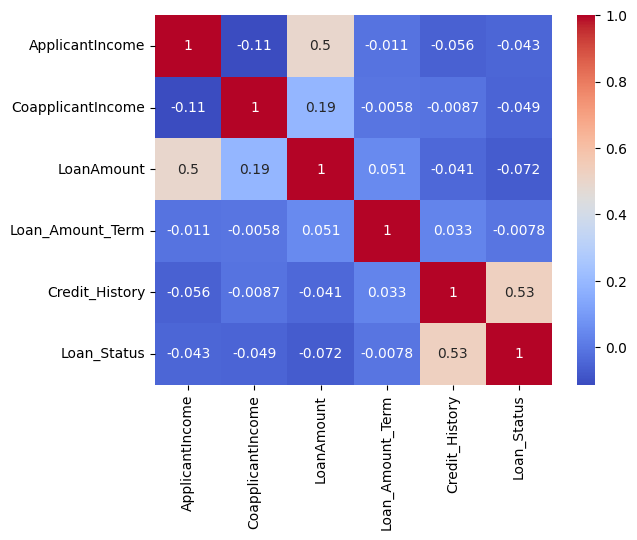

In [58]:
#calculate correlation matrix
corr=loan_dataset.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

# New section

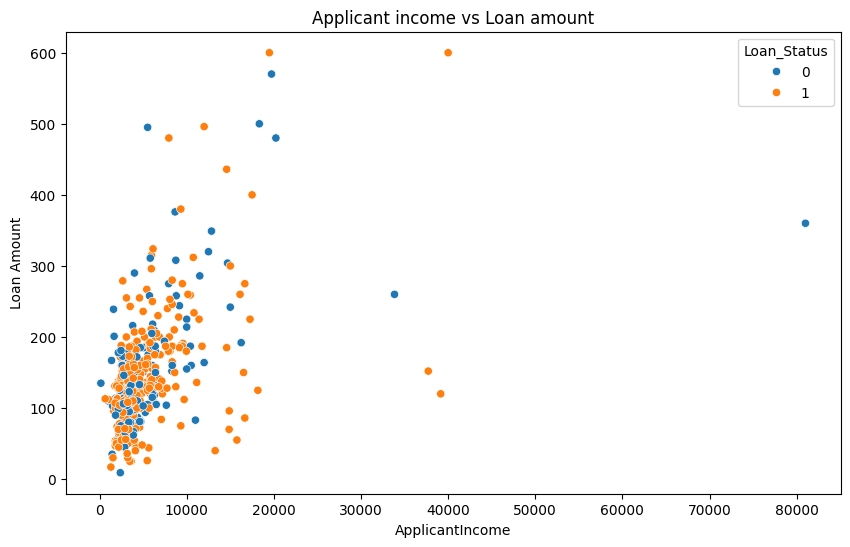

In [59]:
#Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount', data=loan_dataset , hue= 'Loan_Status')
plt.title('Applicant income vs Loan amount')
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan Amount')
plt.show()



<Axes: xlabel='Gender', ylabel='count'>

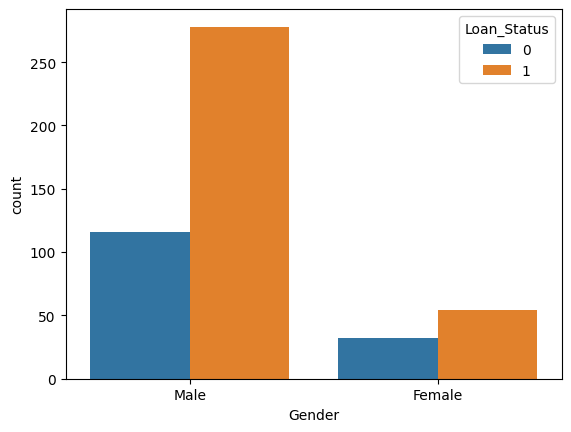

In [60]:
#gender and loan status
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

In [61]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [62]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [63]:
#separating the data and labels
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_dataset['Loan_Status']


In [64]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [65]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [66]:
print(X.shape, X_train.shape, X_test.shape)


(480, 11) (384, 11) (96, 11)


Training the model:

Support Vector Machine Model

In [67]:
#classifier = svm.SVC(kernel='linear')

In [68]:
#training the support Vector Macine model
#classifier.fit(X_train,Y_train)


Using ID3

In [69]:
'''# Initialize and train the decision tree model (ID3)
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))'''

'# Initialize and train the decision tree model (ID3)\nmodel = DecisionTreeClassifier(criterion=\'entropy\', random_state=42)\nmodel.fit(X_train, Y_train)\n\n# Make predictions on the test set\ny_pred = model.predict(X_test)\n\n# Evaluate the model\naccuracy = accuracy_score(Y_test, y_pred)\nprint("Accuracy:", accuracy)\n\n# Print classification report\nprint("Classification Report:")\nprint(classification_report(Y_test, y_pred))\n\n# Print confusion matrix\nprint("Confusion Matrix:")\nprint(confusion_matrix(Y_test, y_pred))'



Random Forest model



In [75]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=40)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

NameError: name 'RandomForestClassifier' is not defined

Using KNN model

In [ ]:
'''# Initialize and train the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))'''

Logistic regression model

In [ ]:
# Initialize and train the logistic regression model
#model = LogisticRegression()
#model.fit(X_train, Y_train)

# Make predictions on the test set
#Y_pred = model.predict(X_test)


Model Evaluation

In [ ]:
'''# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)



# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))'''

In [ ]:
# accuracy score on training data
#X_train_prediction = classifier.predict(X_train)
#training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [ ]:
#print('Accuracy on training data : ', training_data_accuray)

In [ ]:
# accuracy score on test data
#X_test_prediction = classifier.predict(X_test)
#test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [ ]:
#print('Accuracy on test data : ', test_data_accuray)